<a href="https://colab.research.google.com/github/rblanco2023/Time-Series/blob/main/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Actividad 1


*   Generar una serie de tiempo con valores aleatorios y graficarla.
*   Graficar una serie de tiempo del repositorio.
*   Redactar un informe describiendo tres series de tiempo distintas (max. 3 páginas)





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame

Phi =  [0.33806164 0.33966979 0.98690419 0.78147164 0.86180823 0.26141225
 0.76668998 0.42506376 0.88979306]


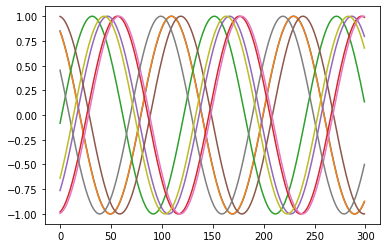

In [ ]:
N = 300
T = 120
t = np.arange(N)
Phi = np.random.rand(9)
print("Phi = ", Phi)
for phi in Phi:
  plt.plot(np.sin(2*np.pi*(t/T + phi)))

### Importo dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar el dataset en memoria
names = ['Index', 'Date', 'UltimoPrecio']
Data = pd.read_csv("/content/drive/MyDrive/01 - UBA/5 - Series Temporales/Actividades TPs/Actividad 1/TECO2.2010.2021.csv", names=names)

In [ ]:
Data.head()

,Index,Date,UltimoPrecio
0,NaN,fechaHora,ultimoPrecio
1,0.0,2021-06-29 17:00:01.710,185.4
2,1.0,2021-06-28 17:00:03.597,184.5
3,2.0,2021-06-25 17:00:02.383,190.6
4,3.0,2021-06-24 17:00:03.497,191.45


In [ ]:
Data = Data.drop([0])

In [ ]:
##Defino tipos de datos, y el index de la tabla (date)
Data['UltimoPrecio']=pd.to_numeric(Data['UltimoPrecio'])
Data.index = Data['Date']
Data.index = pd.to_datetime(Data['Date'])

In [ ]:
#Realizo un análisis estadístico del dataset
Data.describe()

,Index,UltimoPrecio
count,2771.000000,2771.000000
mean,1385.000000,71.413464
std,800.063123,62.781924
min,0.000000,8.551991
25%,692.500000,16.555273
50%,1385.000000,44.966572
75%,2077.500000,122.900000
max,2770.000000,269.950000


In [ ]:
#Reviso si hay valores null o NaN
for column in Data:
   tot=Data[column].isnull().sum()
   print(column,"Porcentaje de Null",tot/len(Data[column])*100, '%')
for column in Data:
   tot=Data[column].isnull().values.any().sum()
   print(column,"Porcentaje de Nan",tot/len(Data[column])*100, '%')   

Index Porcentaje de Null 0.0 %
Date Porcentaje de Null 0.0 %
UltimoPrecio Porcentaje de Null 0.0 %
Index Porcentaje de Nan 0.0 %
Date Porcentaje de Nan 0.0 %
UltimoPrecio Porcentaje de Nan 0.0 %


In [ ]:
SerieY = Data['UltimoPrecio'].resample('MS').mean()

In [ ]:
SerieY.head()

Date
2010-01-01     9.189224
2010-02-01     9.029135
2010-03-01     9.493496
2010-04-01    10.815816
2010-05-01     9.798294
Freq: MS, Name: UltimoPrecio, dtype: float64

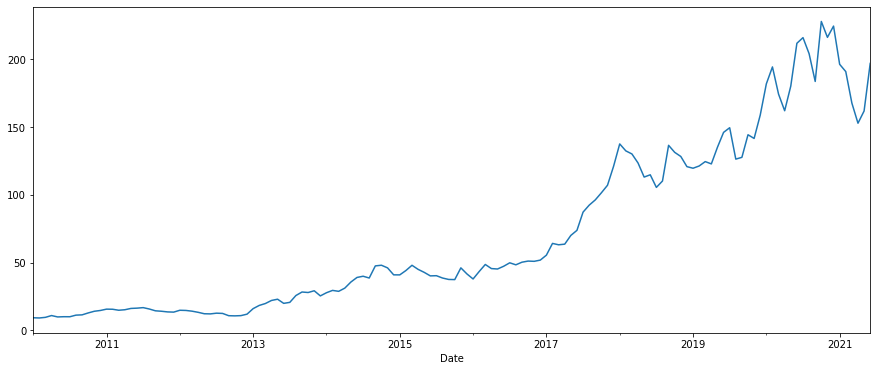

In [ ]:
SerieY.plot(figsize=(15, 6))
plt.show()

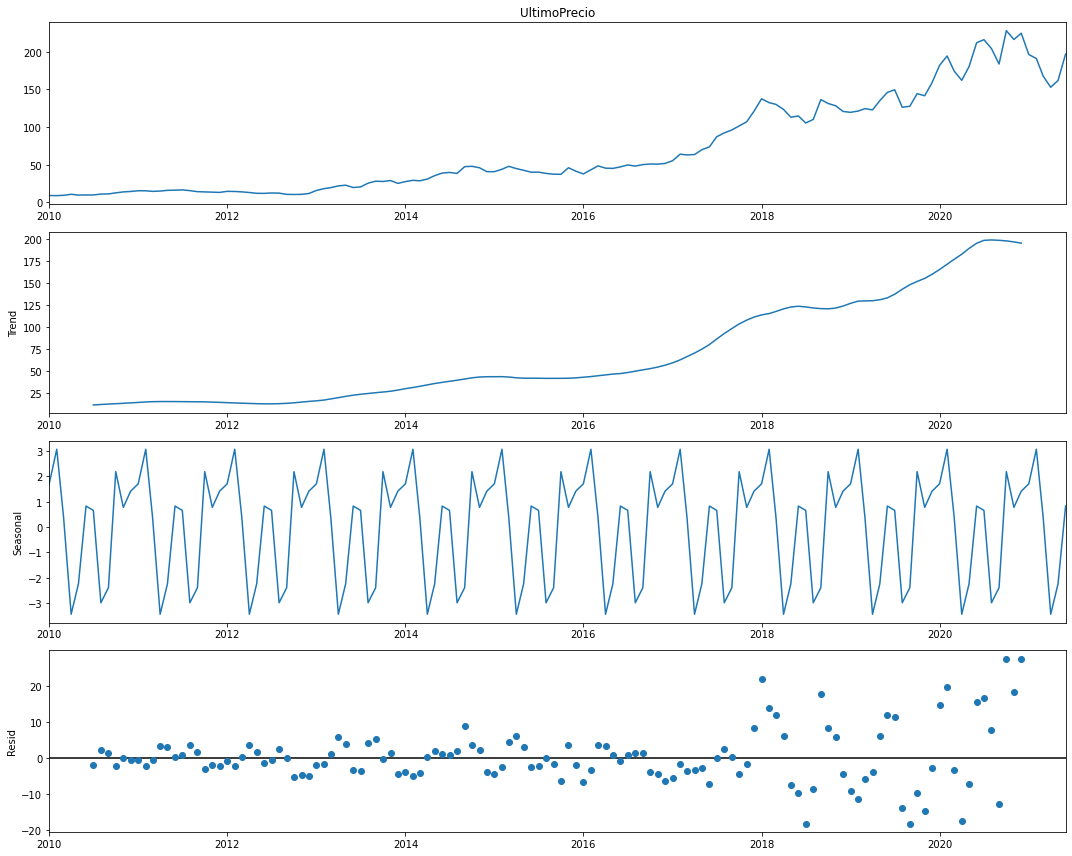

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
decomposition = sm.tsa.seasonal_decompose(SerieY, model='additive')
fig = decomposition.plot()
plt.show()

##Estudio otro dataset

In [ ]:
from matplotlib.pylab import datetime64
##Importo otro dataset
# Cargar el dataset en memoria
names = ['Date', 'ArenaOfValor', 'ClashRoyale',	'EAGamesFlat',	'Fortnite',	'GameLoft',	'Grand Total']
#Dtype = {'Fortnite':np.float64}
Data_gaming = pd.read_csv("/content/drive/MyDrive/01 - UBA/5 - Series Temporales/Actividades TPs/Actividad 1/Gaming.csv", delimiter=";", header=None, names=names, skiprows=1)#, index_col=0)

In [ ]:
Data_gaming.head()

,Date,ArenaOfValor,ClashRoyale,EAGamesFlat,Fortnite,GameLoft,Grand Total
0,Row Labels,ArenaOfValor,ClashRoyale,EAGamesFlat,Fortnite,GameLoft,Grand Total
1,2020-05-25 18,1.65,3.72,4.5,10.1,3.28,23.25
2,2020-05-25 19,2.5,3.38,9.08,13.15,3.42,31.53
3,2020-05-25 20,1.35,2.39,5.8,11.38,2.55,23.47
4,2020-05-25 21,2.1,1.82,4.37,8.72,1.52,18.53


In [ ]:
Data_gaming = Data_gaming.drop([0])
Data_gaming = Data_gaming.drop([234])

In [ ]:
#Data_gaming = Data_gaming.drop(0)
#Data_gaming.rename(columns={'Traffic_GB': 'Date',
 #                           'Column Labels': 'ArenaOfValor',
  #                          'Unnamed: 2': 'ClashRoyale',
   #                        'Unnamed: 4': 'Fortnite',
    #                        'Unnamed: 5': 'GameLoft',
     #                       'Unnamed: 6': 'Grand Total'},inplace=True)
#Data_gaming.head()

In [ ]:
Data_gaming.describe()

,Date,ArenaOfValor,ClashRoyale,EAGamesFlat,Fortnite,GameLoft,Grand Total
count,233,233,233,233,233,233,233
unique,233,166,178,214,200,200,224
top,2020-05-25 18,0.54,4.17,8.25,1.07,5.83,6.48
freq,1,4,5,2,3,3,2


In [ ]:
for column in Data_gaming:
   tot=Data_gaming[column].isnull().sum()
   print(column,"Porcentaje de Null",tot/len(Data_gaming[column])*100, '%')
for column in Data_gaming:
   tot=Data_gaming[column].isnull().values.any().sum()
   print(column,"Porcentaje de Nan",tot/len(Data_gaming[column])*100, '%')

Date Porcentaje de Null 0.0 %
ArenaOfValor Porcentaje de Null 0.0 %
ClashRoyale Porcentaje de Null 0.0 %
EAGamesFlat Porcentaje de Null 0.0 %
Fortnite Porcentaje de Null 0.0 %
GameLoft Porcentaje de Null 0.0 %
Grand Total Porcentaje de Null 0.0 %
Date Porcentaje de Nan 0.0 %
ArenaOfValor Porcentaje de Nan 0.0 %
ClashRoyale Porcentaje de Nan 0.0 %
EAGamesFlat Porcentaje de Nan 0.0 %
Fortnite Porcentaje de Nan 0.0 %
GameLoft Porcentaje de Nan 0.0 %
Grand Total Porcentaje de Nan 0.0 %


In [ ]:
#Data_gaming.index = pd.to_datetime(Data_gaming)

In [ ]:
Data_gaming.index = Data_gaming['Date']
Data_gaming.index = pd.to_datetime(Data_gaming['Date'])
#Data_gaming['Date'] = pd.DatetimeIndex(Data_gaming['Date'])

In [ ]:
Data_gaming.index

DatetimeIndex(['2020-05-25 18:00:00', '2020-05-25 19:00:00',
               '2020-05-25 20:00:00', '2020-05-25 21:00:00',
               '2020-05-25 22:00:00', '2020-05-25 23:00:00',
               '2020-05-26 00:00:00', '2020-05-26 01:00:00',
               '2020-05-26 02:00:00', '2020-05-26 03:00:00',
               ...
               '2020-06-04 01:00:00', '2020-06-04 02:00:00',
               '2020-06-04 03:00:00', '2020-06-04 04:00:00',
               '2020-06-04 05:00:00', '2020-06-04 06:00:00',
               '2020-06-04 07:00:00', '2020-06-04 08:00:00',
               '2020-06-04 09:00:00', '2020-06-04 10:00:00'],
              dtype='datetime64[ns]', name='Date', length=233, freq=None)

In [ ]:
#Convierto el tipo de datos
Data_gaming['ArenaOfValor']=pd.to_numeric(Data_gaming['ArenaOfValor'])
Data_gaming['ClashRoyale']=pd.to_numeric(Data_gaming['ClashRoyale'])
Data_gaming['EAGamesFlat']=pd.to_numeric(Data_gaming['EAGamesFlat'])
Data_gaming['Fortnite']=pd.to_numeric(Data_gaming['Fortnite'])
Data_gaming['GameLoft']=pd.to_numeric(Data_gaming['GameLoft'])
Data_gaming['Grand Total']=pd.to_numeric(Data_gaming['Grand Total'])

In [ ]:
Data_gaming.columns

Index(['Date', 'ArenaOfValor', 'ClashRoyale', 'EAGamesFlat', 'Fortnite',
       'GameLoft', 'Grand Total'],
      dtype='object')

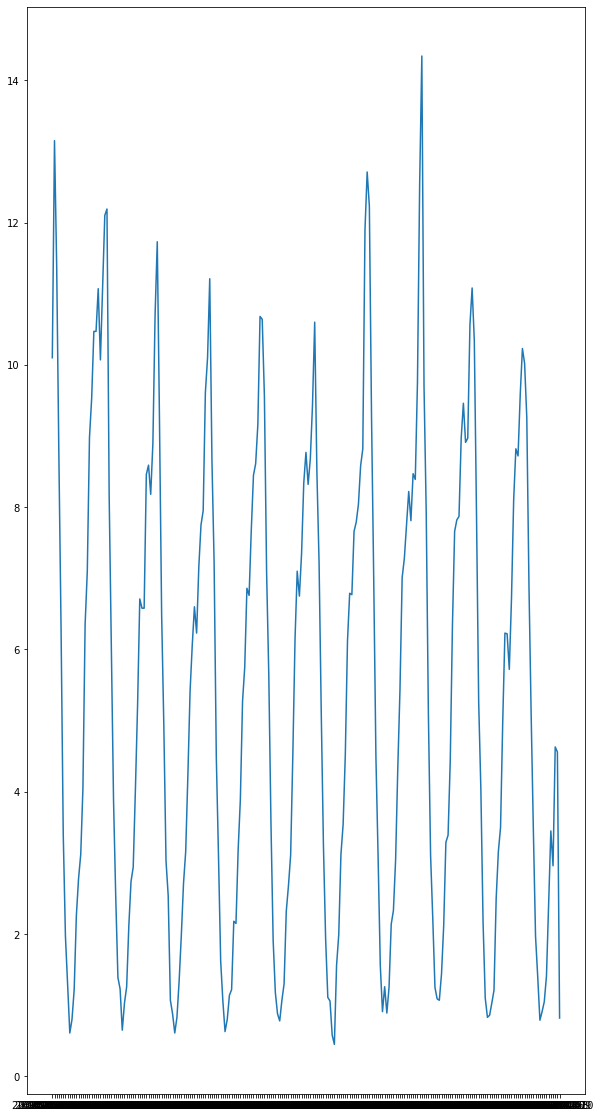

In [ ]:
plt.plot(Data_gaming['Date'],Data_gaming['Fortnite'])

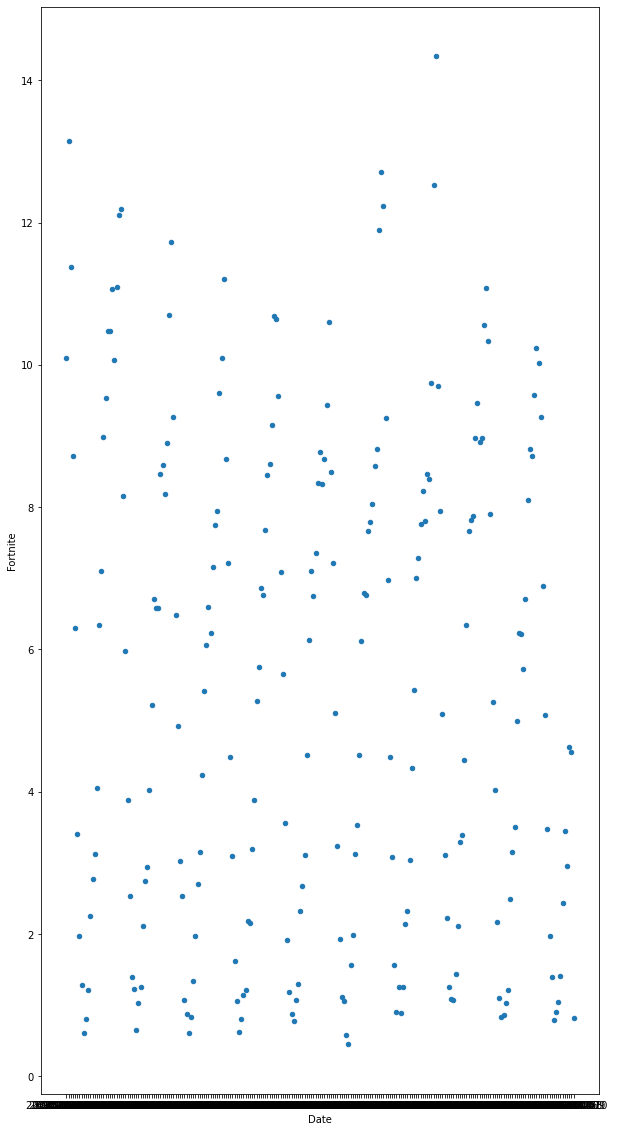

In [ ]:
Data_gaming.plot('Date', "Fortnite", kind="scatter")

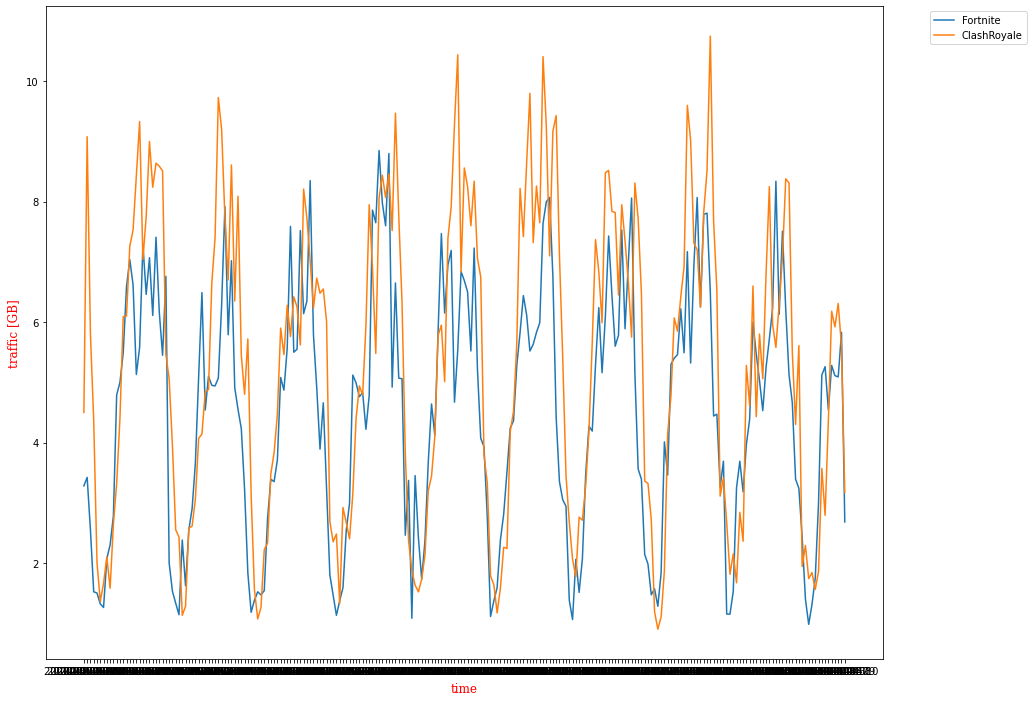

In [ ]:
dataset_gaming = Data_gaming.to_numpy()
plt.plot(dataset_gaming[:,0],dataset_gaming[:,5], label="Fortnite")
plt.plot(dataset_gaming[:,0],dataset_gaming[:,3], label="ClashRoyale")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("traffic [GB]", family='serif', color='r', weight='normal', size = 12, labelpad = 6)
plt.xlabel("time", family='serif', color='r', weight='normal', size = 12, labelpad = 6)

plt.rcParams["figure.figsize"]=(10,10)